In [2]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as se


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv("/content/drive/My Drive/CSS/netflix_titles.csv", index_col = ['show_id'])
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


# 1. Data preparation

## 1.1. Check duplicates values in the dataset.


In [4]:
# df_duplicated= df[df.duplicated()]
# df_duplicated
df_duplicated= df[df.duplicated(['type','title','director', 'cast', 'country','date_added','release_year','rating','duration','listed_in','description'])]
df_duplicated

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


## 1.2. Find the missing rows in each column.

In [5]:
df_missingrows= df[df.isnull()]
df_missingrows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80117401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70234439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80058654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80125979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80000063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70286564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80116008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3. Remove the NaN values from the dataset.

In [6]:
df_updated=df.dropna()
df_updated.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## 1.4 change the ‘date added’ values to the only year. And rename the column    ‘added year’.

In [7]:
df_updated.date_added = pd.DatetimeIndex(df_updated['date_added']).year
df_renamed=df_updated.rename({'date_added':'added_year'},axis=1)
df_renamed.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,type,title,director,cast,country,added_year,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## Make a copy of the dataset.

In [8]:
df_copy= df_renamed.copy()
df_copy.head()

,type,title,director,cast,country,added_year,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## 1.6. In the copied dataset,remove all the columns, except for the ‘show-id’, ‘type’ and ‘cast’.

In [9]:
df_copy=df_copy.drop(['title','director','country','added_year','release_year','rating','duration','listed_in','description'],axis=1)


In [10]:
# x=df_copy.loc[:,'cast']
# x
x=df_copy['cast']
len(x)

3774

In [11]:
y=[]
y=x[x.index[0]].strip(',')
y = y.split(', ')
y[0]

'Alan Marriott'

In [12]:
y[0],x.index[0],df_copy['type'][x.index[0]]

('Alan Marriott', 81145628, 'Movie')

In [13]:
df_copy_1= pd.DataFrame(columns=['actor_name','show_id','type'])
df_network= pd.DataFrame(columns=['source','target'])
j=0
for i in range(len(df_copy['cast'])):
    y=[]
    y=x[x.index[i]].strip()
    y=y.split(', ')
  
    for item in y:
        # print(item)
        df_copy_1.loc[j]=(item,x.index[i],df_copy['type'][x.index[i]])
        #this one for network analysis
        
        df_network.loc[j]=(y[0],item)
        j=j+1
        # print(df_copy_1.loc[i])

In [14]:
df_copy_1=df_copy_1.reset_index(drop=True)
# df_copy_1.iloc[1][1] == df_copy_1.iloc[4][1] 
df_copy_1

,actor_name,show_id,type
0,Alan Marriott,81145628,Movie
1,Andrew Toth,81145628,Movie
2,Brian Dobson,81145628,Movie
3,Cole Howard,81145628,Movie
4,Jennifer Cameron,81145628,Movie
...,...,...,...
29384,Cengiz Bozkurt,80126599,TV Show
29385,Osman Sonant,80126599,TV Show
29386,Köksal Engür,80126599,TV Show
29387,Ege Tanman,80126599,TV Show


In [15]:
# df_copy_1#network dataframe 
# # for i in  range(len(df_copy_1)):
# #     for j in range
# df_network= pd.DataFrame(columns=['source','target'])
# k=0
# for i in range(len(df_copy_1)):
#     for j in range(len(df_copy_1)):
#         if df_copy_1.iloc[i][0] != df_copy_1.iloc[j][0] :
#             if df_copy_1.iloc[i][1] == df_copy_1.iloc[j][1]:
#                 # print(df_copy_1.iloc[i][0],df_copy_1.iloc[j][0])
#                 df_network.loc[k]=(df_copy_1.iloc[i][0],df_copy_1.iloc[j][0])
#                 k=k+1

       

# df_network
    

# 2. Data Discovering:

## 2.1. Plot the number of movies vs TV shows.

Text(0, 0.5, 'Number of Movie and TV shows')

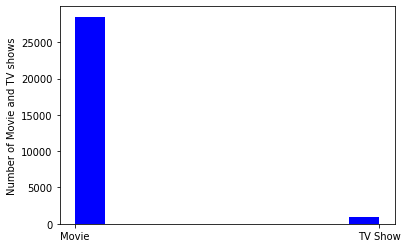

In [16]:
plt.hist(df_copy_1['type'],color='b') 
plt.ylabel('Number of Movie and TV shows')

# df_copy_1.groupby('type').count()

## 2.2. Plot the number of releases per year. Give an interpretation.

Interpretation: Releases drastically increased after 2010 and achieved max in 2017. And, then dropped significantly after 2017. Mean release: 54.69565217391305


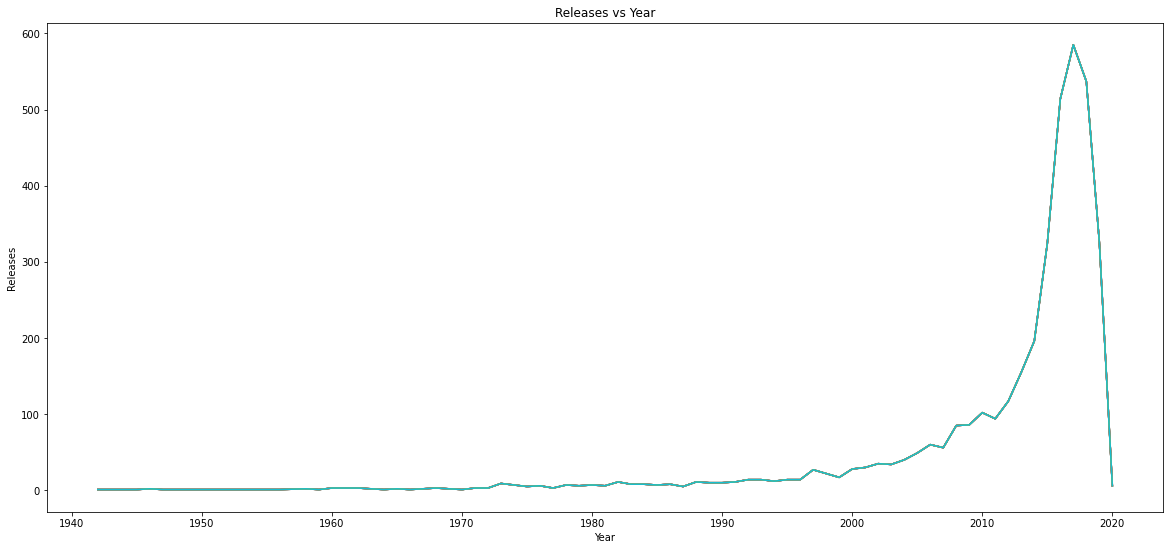

In [17]:
# plt.plot()
x=df_renamed.groupby('release_year').count()
plt.figure(figsize=(20,9))
plt.plot(x)
plt.xlabel('Year')
plt.ylabel('Releases')

plt.title('Releases vs Year')
print('Interpretation: Releases drastically increased after 2010 and achieved max in 2017. And, then dropped significantly after 2017. Mean release:',x.mean()[0])


## 2.3. What is the highest year in adding new shows?

In [18]:
adding_year_max=df_renamed[df_renamed['type']=='TV Show'].groupby('added_year').count().idxmax(axis=0)[0]
# printdf_shows.idxmax(axis=0)[0]
print('Highest year in adding new shows is :',adding_year_max)

Highest year in adding new shows is : 2019


# 2.4. What are the types of ratings for the movies? Plot for each rating the number of movies.

In [19]:
ratings=df_renamed[df_renamed['type']=='Movie']['rating'].unique()
print('Types of ratings for the movies are :' ,ratings)

Types of ratings for the movies are : ['TV-PG' 'TV-14' 'R' 'TV-MA' 'NR' 'PG-13' 'PG' 'TV-Y7' 'G' 'TV-G' 'UR'
 'TV-Y7-FV' 'TV-Y' 'NC-17']


# 3. Social Network analysis:

## 3.1. Create a co-acting network, where the nodes are actors and the edges are the links between actors if they have participated in the same movie or TV-show at least once.

In [20]:
#dropping duplicate
df_network=df_network.drop(df_network[df_network['source']==df_network['target']].index)
df_network

,source,target
1,Alan Marriott,Andrew Toth
2,Alan Marriott,Brian Dobson
3,Alan Marriott,Cole Howard
4,Alan Marriott,Jennifer Cameron
5,Alan Marriott,Jonathan Holmes
...,...,...
29384,Ali Atay,Cengiz Bozkurt
29385,Ali Atay,Osman Sonant
29386,Ali Atay,Köksal Engür
29387,Ali Atay,Ege Tanman


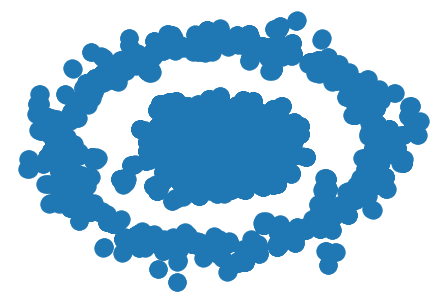

In [21]:
g=nx.from_pandas_edgelist(df=df_network,source='source',target='target')
nx.draw(g)

## 3.2. Compute the betweenness centrality, degree centrality , and closeness centrality for each node 

In [ ]:
degree_cen=nx.degree_centrality(g)
degree_cen

In [ ]:
betweenness_cent=nx.betweenness_centrality(g)
betweenness_cent

In [ ]:
closeness_cent=nx.closeness_centrality(g)
closeness_cent

## 3.3. For each centrality measure, find the actor with the highest value.

In [36]:
max_Dgc = max(degree_cen, key=degree_cen.get)
print('Maximum degree centrality actor is:', max_Dgc)
max_Dgc = max(betweenness_cent, key=betweenness_cent.get)
print('Maximum betweenness centrality actor is:', max_Dgc)
max_cls = max(closeness_cent, key=closeness_cent.get)
print('Maximum closeness centrality actor is:', max_cls)

Maximum degree centrality actor is: Shah Rukh Khan
Maximum closeness centrality actor is: Greg Kinnear


## 3.4. Compute the average length of the shortest path and the average clustering coefficient.

In [59]:

cluster_coeff=nx.average_clustering(g, nodes=None, weight=None)
print('The average clustering coefficient is:',cluster_coeff)

'''graph is not connected error while calculating average shortest path'''
# average_shortest_p = nx.average_shortest_path_length(g, weight=None)
# print('The average shortest path  is:',average_shortest_p)



The average clustering coefficient is: 0.0166091484246775


'graph is not connected error while calculating'

## 3.5. Shuffle your data and take the first 100 rows and plot two modes network (see the figure below)

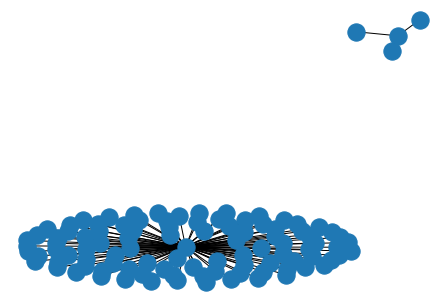

In [104]:
df_copy_1 = df_copy_1.sample(frac=1).reset_index(drop=True)
df_head= df_copy_1.head(100)
G=nx.from_pandas_edgelist(df=df_head,source='actor_name',target='type')
nx.draw(G,label=True)